After save each data with all the embeddings together lets start with the sentiments classification using machine learning and deep learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('/content/df_con_valencia_decimal_todo_SIN_NORMALIZAR.csv')

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalizar los embeddings
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
for label in [1, 2, 4, 8, 16, 32]:
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=f'Clase {label}', alpha=0.6)

plt.title('Visualización t-SNE de las clases')
plt.legend()
plt.grid(True)
plt.show()

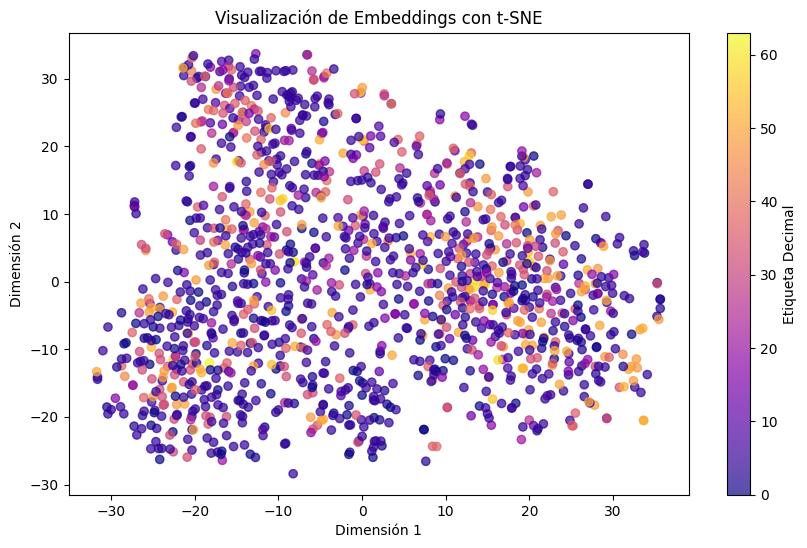

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y etiquetas (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalizar los embeddings
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension_1', 'Dimension_2'])
tsne_df['Decimal_Label'] = y

# Graficar los datos
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    tsne_df['Dimension_1'],
    tsne_df['Dimension_2'],
    c=tsne_df['Decimal_Label'],
    cmap='plasma',     # Aquí elegimos tonos morados
    alpha=0.7
)
plt.colorbar(scatter, label="Etiqueta Decimal")
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de Embeddings con t-SNE')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precisión por fold: [0.15909091 0.22348485 0.11742424 0.15530303 0.18560606]
Precisión promedio: 0.16818181818181815

Evaluación solo para etiquetas 1, 2, 4, 8, 16, 32:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        44
           2       0.86      0.88      0.87        50
           4       0.98      0.85      0.91       334
           8       1.00      1.00      1.00         5
          16       1.00      0.91      0.95        22
          32       0.97      0.92      0.94        61

   micro avg       0.96      0.87      0.92       516
   macro avg       0.96      0.91      0.93       516
weighted avg       0.97      0.87      0.92       516



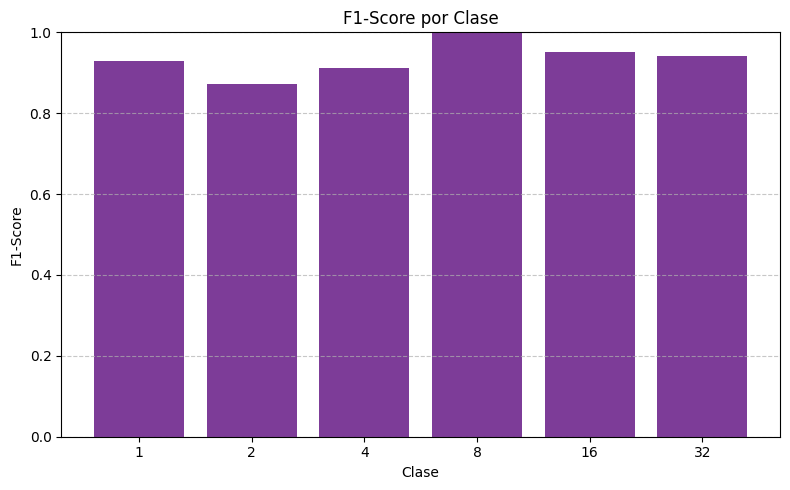

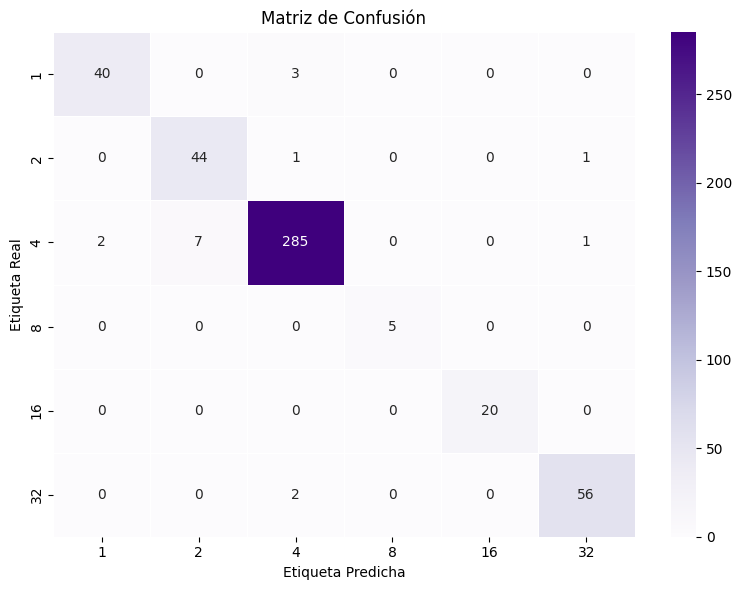

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Características y etiquetas
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Normalizar
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 3. Modelo con balanceo de clases
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
  class_weight='balanced',
    random_state=42
)

# 4. Validación cruzada
scores = cross_val_score(model, X_normalized, y, cv=5)
print("Precisión por fold:", scores)
print("Precisión promedio:", scores.mean())

# 5. Entrenamiento completo
model.fit(X_normalized, y)
y_pred = model.predict(X_normalized)

# 6. Evaluación solo para etiquetas objetivo
etiquetas_objetivo = [1, 2, 4, 8, 16, 32]
indices_objetivo = y.isin(etiquetas_objetivo)

print("\nEvaluación solo para etiquetas 1, 2, 4, 8, 16, 32:")
reporte = classification_report(
    y[indices_objetivo],
    y_pred[indices_objetivo],
    labels=etiquetas_objetivo,
    output_dict=True
)
print(classification_report(
    y[indices_objetivo],
    y_pred[indices_objetivo],
    labels=etiquetas_objetivo
))

# 7. Gráfico de F1-Score por clase
f1_scores = {str(int(label)): reporte[str(label)]['f1-score'] for label in etiquetas_objetivo}
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color='#7D3C98')  # morado fuerte
plt.title('F1-Score por Clase')
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Matriz de Confusión
conf_matrix = confusion_matrix(y[indices_objetivo], y_pred[indices_objetivo], labels=etiquetas_objetivo)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap=sns.color_palette("Purples", as_cmap=True),
    vmin=0,
    linewidths=0.5,
    linecolor='white',
    xticklabels=etiquetas_objetivo,
    yticklabels=etiquetas_objetivo
)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precisión por fold: [0.15909091 0.22348485 0.11742424 0.15530303 0.18560606]
Precisión promedio: 0.16818181818181815

Reporte de clasificación para TODAS las clases:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        92
           1       0.91      0.91      0.91        44
           2       0.80      0.88      0.84        50
           3       0.82      1.00      0.90         9
           4       0.90      0.85      0.88       334
           5       0.88      0.76      0.81       222
           6       0.59      1.00      0.74        10
           7       0.77      0.91      0.83        11
           8       0.83      1.00      0.91         5
           9       0.63      0.67      0.65        18
          10       0.70      1.00      0.82         7
          11       1.00      1.00      1.00         3
          12       0.83      1.00      0.91         5
          13       0.83      0.77      0.80        13
          15       0.83

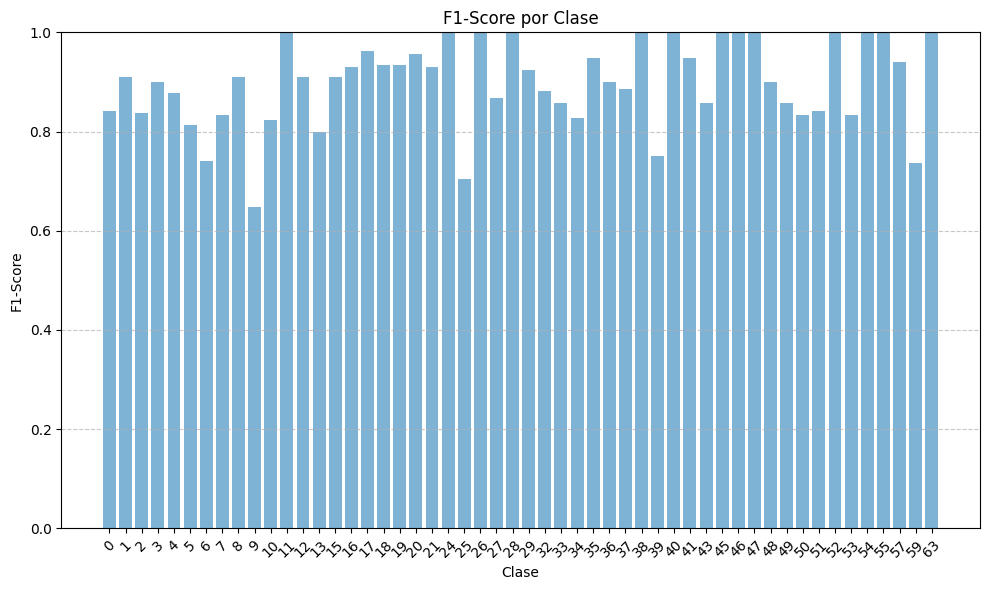

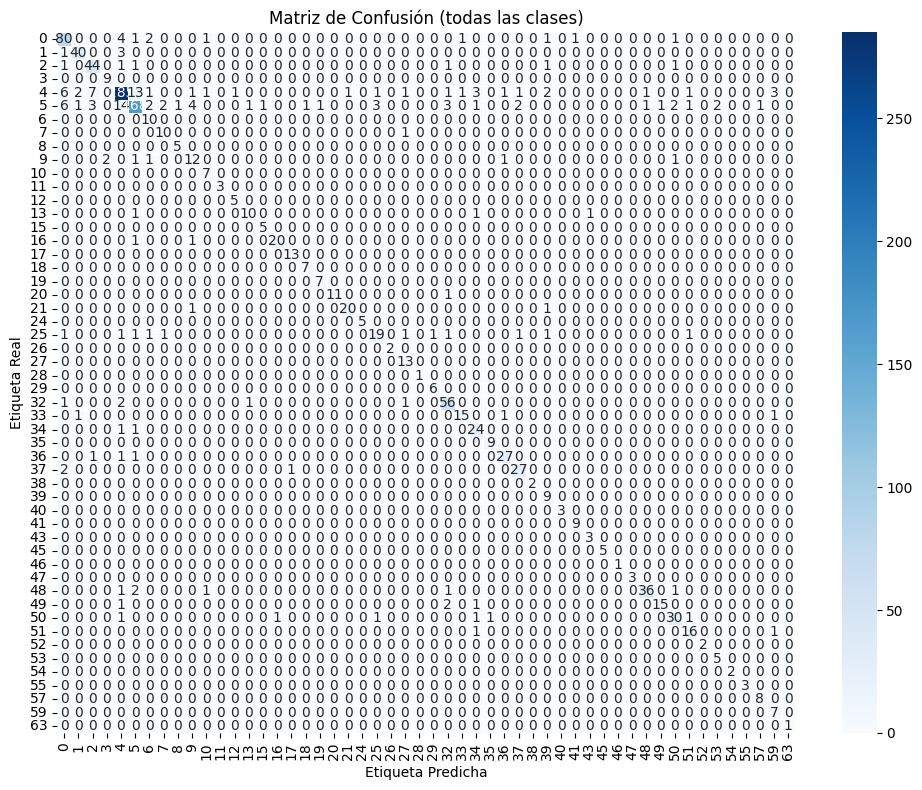

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Características y etiquetas
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Normalizar
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 3. Modelo con balanceo de clases
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

# 4. Validación cruzada
scores = cross_val_score(model, X_normalized, y, cv=5)
print("Precisión por fold:", scores)
print("Precisión promedio:", scores.mean())

# 5. Entrenamiento completo
model.fit(X_normalized, y)
y_pred = model.predict(X_normalized)

# 6. Reporte de clasificación general
print("\nReporte de clasificación para TODAS las clases:")
reporte = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# 7. Gráfico F1-score por clase
import numpy as np

# Extraer los F1-score de cada clase que no sean 'accuracy', 'macro avg', etc.
f1_scores = {clase: reporte[clase]['f1-score']
             for clase in reporte
             if clase.isdigit() or clase.replace('.', '', 1).isdigit()}  # filtra clases numéricas

# Ordenar por clase
f1_scores = dict(sorted(f1_scores.items(), key=lambda x: int(x[0])))

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='#7FB3D5')
plt.title('F1-Score por Clase')
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Matriz de Confusión completa
etiquetas_ordenadas = sorted(y.unique())
conf_matrix = confusion_matrix(y, y_pred, labels=etiquetas_ordenadas)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=etiquetas_ordenadas,
    yticklabels=etiquetas_ordenadas,
    linewidths=0.5,
    linecolor='white'
)
plt.title('Matriz de Confusión (todas las clases)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


Resultados de validación cruzada (6 folds):
Precisión por fold: [0.25       0.26363636 0.27272727 0.27272727 0.28636364 0.25909091]
Precisión promedio: 0.2674242424242424

Evaluación solo para etiquetas 1, 2, 4, 8, 16, 32:
              precision    recall  f1-score   support

           1       1.00      0.11      0.20        44
           2       1.00      0.36      0.53        50
           4       0.75      0.99      0.85       334
           8       0.00      0.00      0.00         5
          16       1.00      0.36      0.53        22
          32       1.00      0.39      0.56        61

   micro avg       0.77      0.74      0.76       516
   macro avg       0.79      0.37      0.45       516
weighted avg       0.83      0.74      0.71       516



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

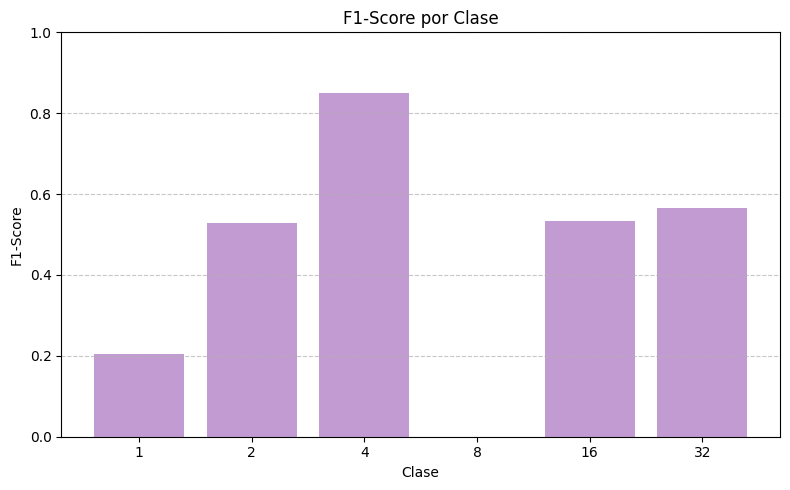

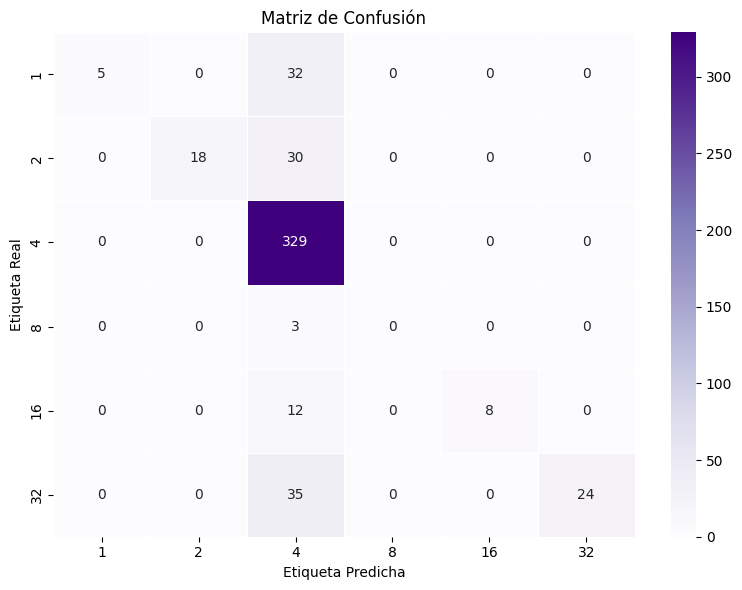

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Escalar características (recomendado para SVM)
scaler = StandardScaler()                            # ESTA ESCALANDO ???
X_scaled = scaler.fit_transform(X)

# 4. Crear el modelo SVM con kernel polinómico
modelo = SVC(kernel='rbf', degree=5, C=1)  # Puedes ajustar el grado del polinomio si quieres

# 5. Validación cruzada (6-fold)# 5
scores = cross_val_score(modelo,X_scaled, y, cv=6)

print("Resultados de validación cruzada (6 folds):")
print("Precisión por fold:", scores)
print("Precisión promedio:", scores.mean())

# 6. Entrenar con todos los datos
modelo.fit(X_scaled, y)

# 7. Predecir etiquetas para todo el conjunto
y_pred = modelo.predict(X_scaled)

# 8. Filtrar etiquetas específicas para evaluación
etiquetas_objetivo = [1, 2, 4, 8, 16, 32]
indices_objetivo = y.isin(etiquetas_objetivo)

# 9. Reporte de clasificación
print("\nEvaluación solo para etiquetas 1, 2, 4, 8, 16, 32:")
reporte = classification_report(
    y[indices_objetivo],
    y_pred[indices_objetivo],
    labels=etiquetas_objetivo,
    output_dict=True
)
print(classification_report(
    y[indices_objetivo],
    y_pred[indices_objetivo],
    labels=etiquetas_objetivo
))

# 10. Graficar F1-score por clase
f1_scores = {str(int(label)): reporte[str(label)]['f1-score'] for label in etiquetas_objetivo}

plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(),  color='#c39bd3')
plt.title('F1-Score por Clase')
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 11. Matriz de Confusión
conf_matrix = confusion_matrix(y[indices_objetivo], y_pred[indices_objetivo], labels=etiquetas_objetivo)

# Usamos solo la parte oscura del colormap
morado_fuerte = sns.color_palette("Purples", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap=morado_fuerte,
    vmin=0,
    linewidths=0.5,
    linecolor='white',
    xticklabels=etiquetas_objetivo,
    yticklabels=etiquetas_objetivo
)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()
